# Логистическая регрессия с помощью scikit-learn

## Содержание

1. Бинарная классификация с двумя параметрами на iris.csv  
2. Бинарная классификация с четырьмя параметрами на iris.csv

## 1. Бинарная классификация с двумя параметрами на iris.csv 

### Предобработка данных

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [58]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [59]:
DATA_DIR = "data" # путь к данным

In [60]:
df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')) # прочитать данные из CSV
#df_iris = df_iris.iloc[:100] # взять только два вида ирисов для бинарной классификации
df_iris = df_iris.sample(frac=1, random_state=42) # перемешать данные
df_iris = df_iris.reset_index(drop=True) # сбросить индексы для красоты

# можно было записать одной строкой
# df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')).iloc[:100].sample(frac=1, random_state=42).reset_index(drop=True)

df_iris['species'] = df_iris['species'].astype('category').cat.codes # заменить setosa и versicolor на 0 и 1
df_iris.head() # вывести первые 5 рядов

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1


In [61]:
# тренировочный датасет
X_train = df_iris[['sepal_length', 'sepal_width']][:67].values # два параметра - sepal_length и sepal_width
y_train = df_iris['species'][:67].values

# тестовый датасет
X_test = df_iris[['sepal_length', 'sepal_width']][67:].values # два параметра - sepal_length и sepal_width
y_test = df_iris['species'][67:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (67, 2)
y_train.shape: (67,)
X_test.shape: (83, 2)
y_test.shape: (83,)


### Визуализация данных

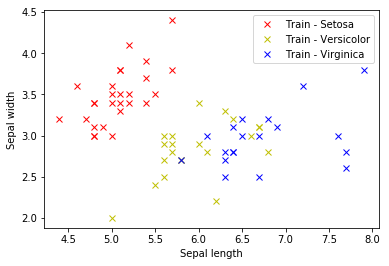

In [71]:
plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'rx', label='Train - Setosa')

plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'yx', label='Train - Versicolor')
plt.plot(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], 'bx', label='Train - Virginica')

plt.xlabel("Sepal length") # надпись по оси X
plt.ylabel("Sepal width") # надпись по оси Y
plt.legend() # отображение легенды
plt.show() # отображение графика

### Создание и тренировка модели

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf = LogisticRegression(random_state=42) # создание модели
clf.fit(X_train, y_train) # обучение

# можно было одной строкой
# clf = LogisticRegression(random_state=42).fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Оценка модели

In [65]:
print("Train score: {}".format(clf.score(X_train, y_train)))
print("Test score: {}".format(clf.score(X_test, y_test)))

Train score: 0.7611940298507462
Test score: 0.6506024096385542


### Визуализация работы модели

In [66]:
h = 0.01
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

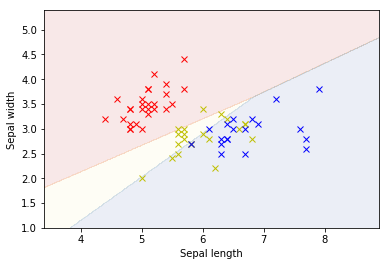

In [72]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'rx', label='Train - Setosa')
plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'yx', label='Train - Versicolor')
plt.plot(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], 'bx', label='Train - Virginica')

# plt.plot(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 'ro', label='Test - Setosa')
# plt.plot(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 'yo', label='Test - Versicolor')
# plt.plot(X_test[y_test == 2][:, 0], X_test[y_test == 2][:, 1], 'bo', label='Test - Virginica')
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.1) # цветовые области

plt.xlabel("Sepal length") # надпись по оси X
plt.ylabel("Sepal width") # надпись по оси Y
#plt.legend() # отображение легенды
plt.show() # отображение графика

## 2. Бинарная классификация с четырьмя параметрами на iris.csv 

### Предобработка данных

In [41]:
import numpy as np
import pandas as pd
import os # для обработки пути к данным как на Unix-системах, так и на Windows

In [42]:
np.random.seed(42) # фиксирование псевдорандомного генератора

In [43]:
DATA_DIR = "data" # путь к данным

In [44]:
df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')) # прочитать данные из CSV
#df_iris = df_iris.iloc[:100] # взять только два вида ирисов для бинарной классификации
df_iris = df_iris.sample(frac=1, random_state=42) # перемешать данные
df_iris = df_iris.reset_index(drop=True) # сбросить индексы для красоты

# можно было записать одной строкой
# df_iris = pd.read_csv(os.path.join(DATA_DIR, 'iris.csv')).iloc[:100].sample(frac=1, random_state=42).reset_index(drop=True)

df_iris['species'] = df_iris['species'].astype('category').cat.codes # заменить setosa и versicolor на 0 и 1
df_iris.head() # вывести первые 5 рядов

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1


In [45]:
# тренировочный датасет
X_train = df_iris.drop(['species'], axis=1).iloc[:67].values # четыре параметра
y_train = df_iris['species'][:67].values

# тестовый датасет
X_test = df_iris.drop(['species'], axis=1).iloc[67:].values # четыре параметра
y_test = df_iris['species'][67:].values

print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (67, 4)
y_train.shape: (67,)
X_test.shape: (83, 4)
y_test.shape: (83,)


### Создание и тренировка модели

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf = LogisticRegression(random_state=42) # создание модели
clf.fit(X_train, y_train) # обучение

# можно было одной строкой
# clf = LogisticRegression(random_state=42).fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Оценка модели

In [40]:
print("Train score: {}".format(clf.score(X_train, y_train)))
print("Test score: {}".format(clf.score(X_test, y_test)))

Train score: 0.7761194029850746
Test score: 0.7272727272727273
